In [18]:
N = ord("I") % 5 + 1
print("My variant is number: " + str(N))

My variant is number: 4



<p>file name: longbottom.jpg</p>
<p>image size: 600x600</p>
<p>glasses color: magenta</p>
<p>line width: 5</p>

Variant number: 4
Excel data loaded successfully.
Variant data: N                             4
file name        longbottom.jpg
image size              600x600
glasses color           magenta
line width                    5
Name: 3, dtype: object


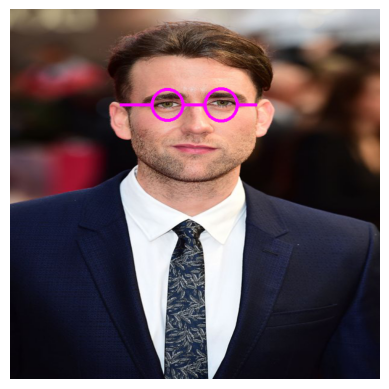

In [123]:

import cv2
import numpy as np 
import pandas as pd
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt


# Step 1: Calculate variant number
def calculate_variant(name: str):
    return ord(name[0].upper()) % 5 + 1

variant = calculate_variant("Illia")
print(f"Variant number: {variant}")

# Step 2: Load lab6.xlsx into a dataframe
file_name = "lab6.xlsx"  
try:
    data = pd.read_excel(file_name)
    print("Excel data loaded successfully.")
except Exception as e:
    print(f"Error loading Excel file: {e}")

# Step 3: Extract data for the variant 
try:
    variant_data = data.iloc[variant - 1]
    print("Variant data:", variant_data)
except Exception as e:
    print(f"Error extracting variant data: {e}")

# Step 4: Create a function to process the image
def process_image(image_path, glasses_color, line_width, output_size=(600, 600)):
    # Load the image using PIL
    image = Image.open(image_path)
    image = image.resize(output_size)
    
    # Convert the image to a format usable by OpenCV
    cv_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    
    # Load Haar Cascade for face and eye detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    
    # Detect faces
    gray = cv2.cvtColor(cv_image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    
    if len(faces) == 0:
        print("No faces detected.")
        return None
    
    # Create the draw object
    draw = ImageDraw.Draw(image)

    for (x, y, w, h) in faces:
        # Focus on the detected face
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = cv_image[y:y+h, x:x+w]
        
        # Detect eyes
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        if len(eyes) < 2:
            print("Less than two eyes detected.")
            continue

        
        # Draw glasses
        circle_centers = []  # To store the circle center coordinates

        for idx, (ex, ey, ew, eh) in enumerate(eyes):
            # Calculate the center of the eye bounding box
            cx, cy = x + ex + ew // 2, y + ey + eh // 2
            

            if idx == 0 or ex < faces[0][2] // 2:  
                cx += 30  # Fine-tune horizontal alignment for the left eye
                cy += 3  # Fine-tune vertical alignment for the left eye
                radius = int(ew * 0.75)  # Adjust radius for the left eye
            else:
                cx += 7
                cy += 3  
                radius = int(ew * 0.5)  
            

            draw.ellipse(
                (cx - radius, cy - radius, cx + radius, cy + radius),
                outline=glasses_color, width=line_width
            )
            circle_centers.append((cx, cy, radius))  
    
    

        # Add line between glasses
        if len(circle_centers) == 2:
            # Extract circle details
            (cx1, cy1, radius1), (cx2, cy2, radius2) = circle_centers
        
            # Adjust line endpoints to be at the horizontal sides of the circles
            bridge_start = (cx1 + radius1, cy1) 
            bridge_end = (cx2 - radius2, cy2)  
        
            draw.line([bridge_start, bridge_end], fill=glasses_color, width=line_width)
        
       # Add temples 
        if len(circle_centers) == 2:
            (cx1, cy1, radius1), (cx2, cy2, radius2) = circle_centers
            
            # Left temple
            left_temple_start = (cx1 - radius1, cy1)  # Start a little to the left of the left eye
            left_temple_end = (cx1 - radius1 - 50, cy1)   # Extend the temple further left
            draw.line([left_temple_start, left_temple_end], fill=glasses_color, width=line_width)
            
            # Right temple
            right_temple_start = (cx2 + radius2, cy2)  # Start a little to the right of the right eye
            right_temple_end = (cx2 + radius2 + 30, cy2)    # Extend the temple further right
            draw.line([right_temple_start, right_temple_end], fill=glasses_color, width=line_width)

        
    image.save("processed_image.jpg")
    plt.imshow(image)
    plt.axis("off")
    plt.show()



process_image(
    image_path="images/longbottom.jpg",
    glasses_color="magenta",
    line_width=5
)
